In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


Average game time

In [3]:
temp_df = df[df["eventType"].isna()]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {}".format(np.mean(match_time)))

The matches have an average time of 25.443348204933265


In [4]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

The matches have an average time of 25.166536970134874 when they win on the red side


In [5]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

The matches have an average time of 25.866262819329023 when they lose on the red side


In [6]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

The matches have an average time of 25.069190414507773 when they win on the blue side


In [7]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

The matches have an average time of 25.904178910519125 when they lose on the blue side


In [8]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"].isna())]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [9]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 847 matches in which the jungler died at least once


In [10]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 23724 times


In [11]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 28.009445100354192 deaths per game


In [12]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6151,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6152,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,1.000117,5281.0,9076.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6153,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,2.000583,2682.0,8436.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6156,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,3.000883,9684.0,2577.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6158,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,4.001017,11260.0,4972.0,3.0,0.0,...,14.0,48.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275394,NA1_4584524732,Blue,anonymous 41,na1,Poppy,26.009117,2980.0,11546.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275396,NA1_4584524732,Blue,anonymous 41,na1,Poppy,27.009233,3041.0,8132.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275397,NA1_4584524732,Blue,anonymous 41,na1,Poppy,28.009250,7145.0,4977.0,14.0,21.0,...,1304.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275400,NA1_4584524732,Blue,anonymous 41,na1,Poppy,29.009800,2580.0,10011.0,14.0,22.0,...,1431.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [13]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 14 matches
anonymous 25 played 19 matches
anonymous 26 played 31 matches
anonymous 27 played 15 matches
anonymous 28 played 8 matches
anonymous 29 played 32 matches
anonymous 30 played 30 matches
anonymous 31 played 21 matches
anonymous 32 played 24 matches
anonymous 34 played 27 matches
anonymous 35 played 15 matches
anonymous 36 played 23 matches
anonymous 37 played 20 matches
anonymous 41 played 12 matches
anonymous 43 played 8 matches
anonymous 46 played 6 matches
anonymous 48 played 13 matches
anonymous 49 played 16 matches
anonymous 50 played 16 matches
anonymous 51 played 9 matches


In [13]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 377 matches in which the jungler died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [14]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [17]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 25 matches
anonymous 25 played 39 matches
anonymous 26 played 43 matches
anonymous 27 played 17 matches
anonymous 28 played 11 matches
anonymous 29 played 34 matches
anonymous 30 played 26 matches
anonymous 31 played 42 matches
anonymous 32 played 34 matches
anonymous 34 played 28 matches
anonymous 35 played 17 matches
anonymous 36 played 25 matches
anonymous 37 played 17 matches
anonymous 41 played 17 matches
anonymous 43 played 14 matches
anonymous 46 played 10 matches
anonymous 48 played 20 matches
anonymous 49 played 28 matches
anonymous 50 played 8 matches
anonymous 51 played 7 matches


In [18]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [19]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the silhouette

In [15]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        #color = np.array(["blueviolet", "yellow", "lime", "crimson"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, edgecolor="k", cmap= "plasma", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

function to visualize the results

In [16]:
def oldVisualizeResults(df, data_scaled, model, team, kmeans, details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')


    # Get the unique cluster labels
    unique_labels = np.unique(df['cluster'])

    # Normalize the cluster labels to range [0, 1]
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_labels)-1)

    # Create a scalar mappable using the colormap and normalized values
    sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
    sm.set_array([])

    # Get the face colors of the PathCollection object by mapping the cluster labels to colors using the scalar mappable
    face_colors = sm.to_rgba(unique_labels)

    colors = []
    # Iterate over the clusters and get the corresponding color code
    for i, label in enumerate(unique_labels):
        colors.append(mcolors.to_hex(face_colors[i]))

    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors="plasma", title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    return colors

In [17]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [18]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [19]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [20]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [21]:
def stagesPerCluster(df, colors):
    c = 0

    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster].copy()
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        stage = []
        for time in temporary_df["timestamp"]:
            if(time < 15):
                stage.append("early game")
            elif((time >= 15) and (time < 25)):
                stage.append("mid game")
            else:
                stage.append("late game")
        
        stage = np.array(stage)
        temporary_df["stages"] = stage
        plt.figure(figsize=(14, 6))
        g = sns.countplot(x='stages', data=temporary_df, color=colors[c]);
        plt.title('Stages of game in cluster {}'.format(cluster));
        ax=g.axes
        c += 1

In [22]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time < 15):
            stage.append("early game")
        elif((time >= 15) and (time < 25)):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Stages of game in clusters');
    ax=g.axes
    c += 1

Function that returns a scatter plot of the timestamps in each cluster:

In [23]:

def scatterTimestamp(df):
    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster]
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        arr = np.arange(1, temporary_df.shape[0]+1, 1)
        temporary_df["death"] = arr 
        #print(temporary_df)
        
        fig, ax = plt.subplots()
        scatter = ax.scatter(temporary_df['death'], temporary_df['timestamp'])
        plt.xlabel('deaths')
        plt.ylabel('timestamp')

        title = "Timestamps of Jungle Player Deaths in cluster " + str(cluster) + "\n"
        plt.title(title)
        plt.grid(visible=None)
        plt.figure(figsize=(2000,6))
        plt.show()

---
### Clustering Red Team Victory

In [27]:
redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6027,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6028,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,1.000400,6759.0,9676.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6029,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,2.000783,11252.0,6975.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6032,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,3.000950,7997.0,6232.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6034,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,4.001467,11488.0,7976.0,3.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [28]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

61.01405099992565

In [34]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 16 matches on the red side
anonymous 24 has an average of 4.25 deaths per game when winning on the red side

anonymous 25 won 15 matches on the red side
anonymous 25 has an average of 5.133333333333334 deaths per game when winning on the red side

anonymous 26 won 26 matches on the red side
anonymous 26 has an average of 3.8461538461538463 deaths per game when winning on the red side

anonymous 27 won 8 matches on the red side
anonymous 27 has an average of 6.0 deaths per game when winning on the red side

anonymous 28 won 6 matches on the red side
anonymous 28 has an average of 3.6666666666666665 deaths per game when winning on the red side

anonymous 29 won 24 matches on the red side
anonymous 29 has an average of 4.375 deaths per game when winning on the red side

anonymous 30 won 16 matches on the red side
anonymous 30 has an average of 3.125 deaths per game when winning on the red side

anonymous 31 won 26 matches on the red side
anonymous 31 has an average of 5.9

In [26]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 275 matches in which the jungler died at least once
20 players died a total of 1118 times on the red side
Victory games on red side contains an average of 4.065454545454545 deaths per game


In [29]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
6027,14176.0,14506.0,0.000000
6028,6759.0,9676.0,1.000400
6029,11252.0,6975.0,2.000783
6032,7997.0,6232.0,3.000950
6034,11488.0,7976.0,4.001467
...,...,...,...
275770,10601.0,7668.0,20.005683
275772,4514.0,10154.0,21.005883
275773,9666.0,3361.0,22.006183
275776,1082.0,1188.0,23.006417


Normalize Data:

In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[ 1.70305411,  1.82454596, -1.53559182],
       [-0.40902088,  0.48930537, -1.4243124 ],
       [ 0.8704119 , -0.25737886, -1.31303483],
       ...,
       [ 0.41878039, -1.2564595 ,  0.91226442],
       [-2.02561111, -1.85717955,  1.0235253 ],
       [-2.02561111, -1.85717955,  1.02738145]])

In [31]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2764740878910545
Silhouette score for k=3: 0.29879152333989184
Silhouette score for k=4: 0.3493057533866473
Silhouette score for k=5: 0.3473261685670225
Silhouette score for k=6: 0.33217964145590934
Silhouette score for k=7: 0.3333273281214047
Silhouette score for k=8: 0.3167788582320354
Silhouette score for k=9: 0.30367826360004
Silhouette score for k=10: 0.3079325834252849
Silhouette score for k=11: 0.30764934311405234
Silhouette score for k=12: 0.3109343392301111
Silhouette score for k=13: 0.31758204229498704
Silhouette score for k=14: 0.31682355201115786
Silhouette score for k=15: 0.3150329985491793
Silhouette score for k=16: 0.3104797671152374
Silhouette score for k=17: 0.3063681258902683
Silhouette score for k=18: 0.3058893864168567
Silhouette score for k=19: 0.30341122897465417
Silhouette score for k=20: 0.3025441744000507
Silhouette score for k=25: 0.30386939482562664


K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 4

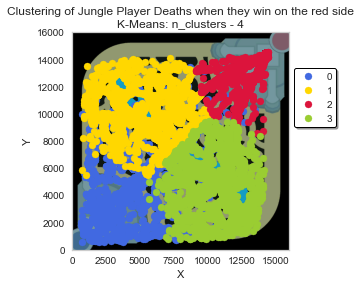

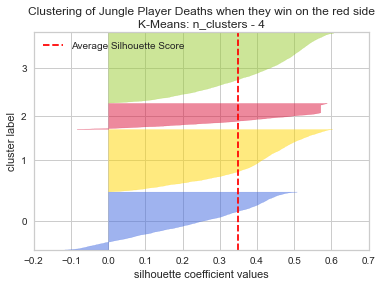

Silhouette score: 0.3493057533866473
3    2660
1    2364
0    2201
2     982
Name: cluster, dtype: int64

Inertia: 9643.201786540627

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5605.001363,6004.398910,24.545201
1,1,5837.186548,10379.277919,9.236655
2,2,13086.622200,13237.017312,9.618205
3,3,10628.785714,5313.415789,10.523552


In [35]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "crimson", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [36]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2727.715320,2999.007419,5.414200
1,1,1970.708493,1650.549004,5.701464
2,2,1341.460694,1437.335030,9.347682
3,3,1590.059037,2025.852370,5.720117


In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

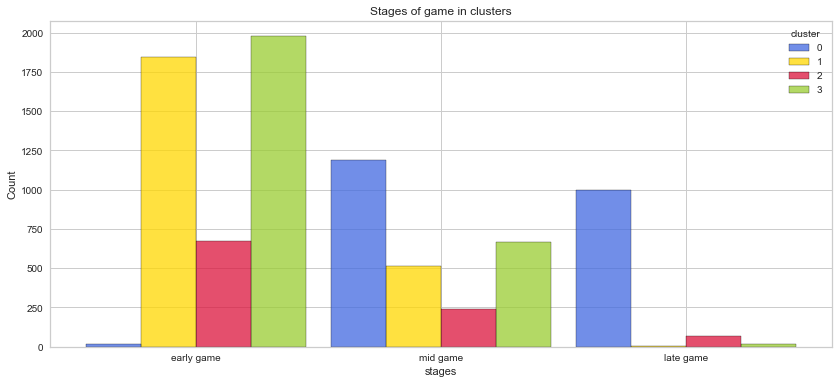

In [38]:
stagesPerClusterV2(redSideVictory_df, colors)

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 3

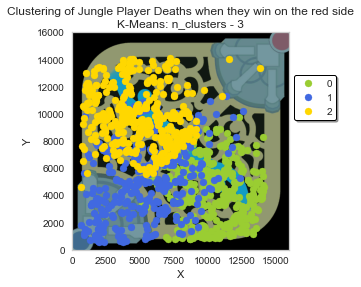

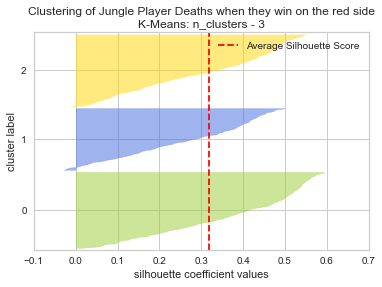

Silhouette score: 0.3185664901450735
0    406
2    382
1    330
Name: cluster, dtype: int64

Inertia: 1577.5123458516016

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10322.586207,4376.665025,10.944825
1,1,5472.412121,5248.951515,24.374344
2,2,4933.392670,9800.450262,13.258705


In [32]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [42]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1975.783261,2044.107278,5.769071
1,1,2561.216264,2655.365599,4.973918
2,2,2263.963954,2063.262152,5.966207


In [43]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14129.0,5128.0,9765.0,791.0,27.738867,0.784400
1,1,12568.0,680.0,11413.0,572.0,40.960933,13.914550
2,2,13818.0,678.0,14089.0,4615.0,31.235050,0.756083


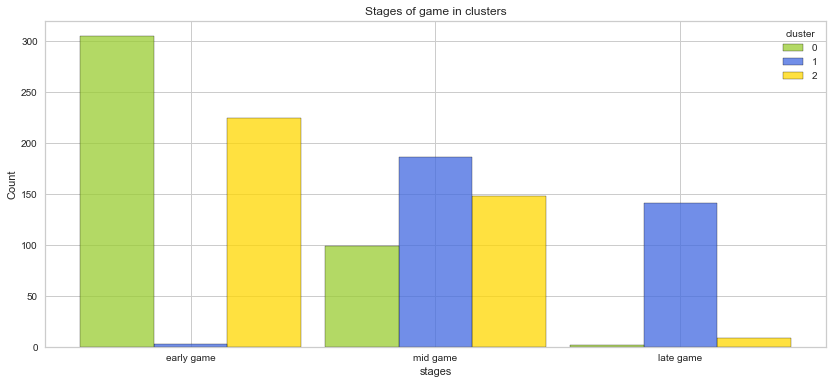

In [176]:
stagesPerClusterV2(redSideVictory_df, colors)

In [33]:
kmeans.cluster_centers_

array([[ 0.97539917, -0.64006522, -0.59428403],
       [-0.47001357, -0.37554375,  1.08428991],
       [-0.63064813,  1.00470135, -0.30506899]])

In [32]:
pv.start_xvfb()
redSideVictory_df =redSideVictory_df.sort_values(by='timestamp')
redSideVictory_df2 =redSideVictory_df
redSideVictory_df2["timestamp"] =redSideVictory_df["timestamp"].mul(100)
points = np.column_stack((redSideVictory_df2['coordinate_x'].to_numpy(),redSideVictory_df2['coordinate_y'].to_numpy(),redSideVictory_df2['timestamp'].to_numpy()))
grid = pv.UnstructuredGrid()
grid.points = points

# Assign cluster labels to points
cluster_labels =redSideVictory_df2["cluster"]
if len(cluster_labels) != grid.GetNumberOfPoints():
    print("Error: Number of cluster labels does not match number of points")
else:
    cluster_labels = np.expand_dims(cluster_labels, axis=1)
    cluster_data = vtk.vtkIntArray()
    cluster_data.SetNumberOfComponents(1)
    cluster_data.SetName('cluster')
    cluster_data.SetArray(cluster_labels, grid.GetNumberOfPoints(), 1)

grid.GetPointData().AddArray(cluster_data)

# Create cell array
cells = vtk.vtkCellArray()

# Create vertices for each point and add them to the cell array
for i in range(grid.GetNumberOfPoints()):
    vertex = vtk.vtkVertex()
    vertex.GetPointIds().SetId(0, i)
    cells.InsertNextCell(vertex)

# Assign cell array to the grid
grid.SetCells(vtk.VTK_VERTEX, cells)

# Create plane mesh with the same dimensions as XY plane
xmin, xmax, ymin, ymax, zmin, zmax = grid.bounds
ground = pv.Plane(center = ((xmax-xmin)/2, (ymax-ymin)/2, -1), i_size=(16000), j_size=(16000), i_resolution=1, j_resolution=1)
ground.rotate_x(360)



# Load texture image and map it onto the plane
texture_path = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png"
texture = pv.read_texture(texture_path)
ground.texture_map_to_plane(inplace=True)


plotter = pv.Plotter()


plotter.add_mesh(grid, scalars='cluster', cmap='Set1')
plotter.add_mesh(ground, texture=texture)


#plotter.camera_position = [(redredSideVictory_df2['coordinate_x'].min()+redredSideVictory_df2['coordinate_y'].max())/2, (redredSideVictory_df2['coordinate_x'].min()+redredSideVictory_df2['coordinate_y'].max())/2,redSideVictory_df2['timestamp'].max()*2]
#plotter.camera_orientation = [180, -90, 0]



plotter.show()

Widget(value="<iframe src='http://localhost:42271/index.html?ui=P_0x7f68cbf4ec40_1&reconnect=auto' style='widt…

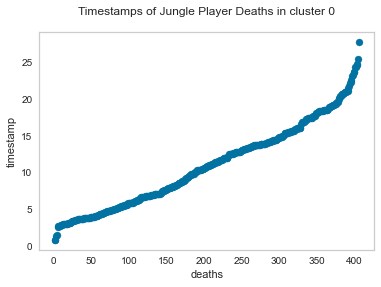

<Figure size 144000x432 with 0 Axes>

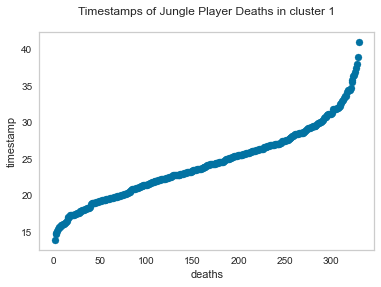

<Figure size 144000x432 with 0 Axes>

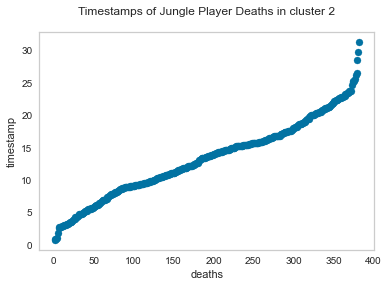

<Figure size 144000x432 with 0 Axes>

In [45]:
scatterTimestamp(redSideVictory_df)

K-Means with k = 2

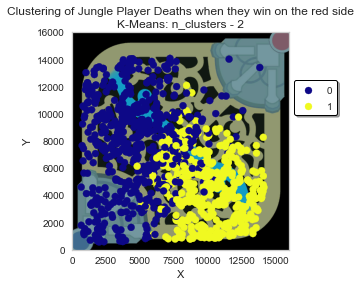

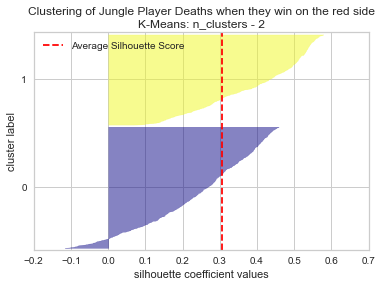

Silhouette score: 0.3065433211883323
0    641
1    477
Name: cluster, dtype: int64

Inertia: 2214.879977090049

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4883.421217,7859.344774,18.982378
1,1,9960.480084,4643.631027,11.287744


In [46]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [47]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2334.660947,3286.373610,7.602992
1,1,2070.603996,2246.032959,6.196670


In [48]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13818.0,678.0,14089.0,572.0,40.960933,1.011533
1,1,14129.0,4795.0,12100.0,791.0,32.147700,0.756083


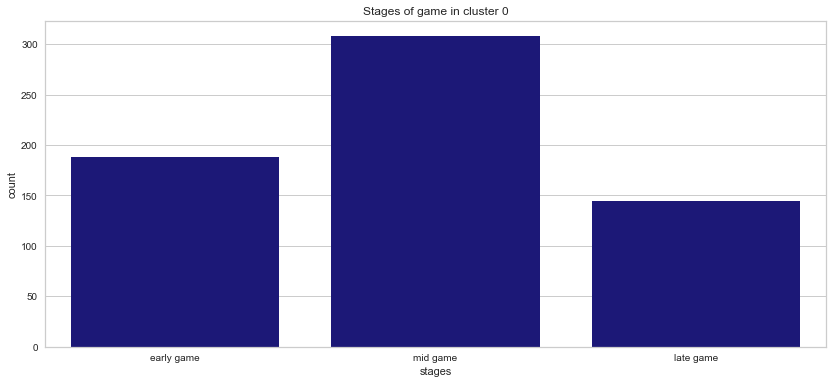

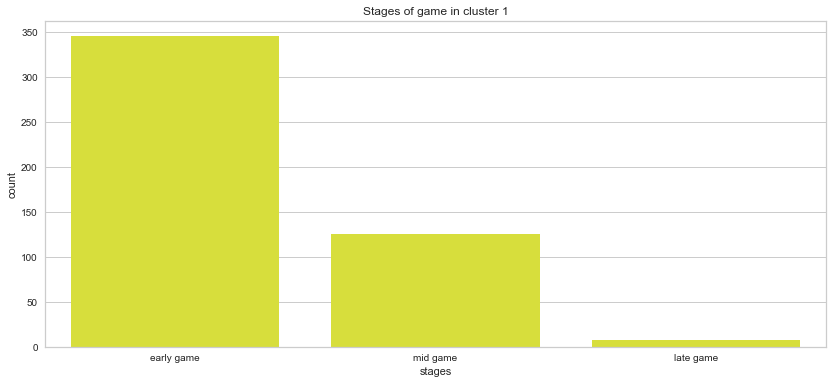

In [49]:
stagesPerCluster(redSideVictory_df, colors)

In [ ]:
scatterTimestamp(redSideVictory_df)

---
### Clustering Red Team Defeat

In [39]:
redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275715,KR_6375903925,Red,anonymous 48,kr,Elise,30.009383,3384.0,11610.0,14.0,35.0,...,1840.0,1319.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275717,KR_6375903925,Red,anonymous 48,kr,Elise,31.009567,9090.0,8635.0,15.0,35.0,...,1972.0,1517.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275719,KR_6375903925,Red,anonymous 48,kr,Elise,32.009900,5828.0,8825.0,16.0,42.0,...,1972.0,1517.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275721,KR_6375903925,Red,anonymous 48,kr,Elise,33.010283,6544.0,14078.0,16.0,42.0,...,2099.0,1736.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [40]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

38.98594900007434

In [36]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 9 matches on the red side
anonymous 24 has an average of 6.333333333333333 deaths per game when losing on the red side

anonymous 25 lost 24 matches on the red side
anonymous 25 has an average of 7.333333333333333 deaths per game when losing on the red side

anonymous 26 lost 17 matches on the red side
anonymous 26 has an average of 6.411764705882353 deaths per game when losing on the red side

anonymous 27 lost 9 matches on the red side
anonymous 27 has an average of 7.222222222222222 deaths per game when losing on the red side

anonymous 28 lost 5 matches on the red side
anonymous 28 has an average of 8.0 deaths per game when losing on the red side

anonymous 29 lost 10 matches on the red side
anonymous 29 has an average of 6.5 deaths per game when losing on the red side

anonymous 30 lost 10 matches on the red side
anonymous 30 has an average of 5.8 deaths per game when losing on the red side

anonymous 31 lost 16 matches on the red side
anonymous 31 has an average

In [31]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 187 matches in which the jungler died at least once
20 players died a total of 1241 times on the red side
Defeat games on red side contains an average of 6.636363636363637 deaths per game


In [41]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
5904,14176.0,14506.0,0.000000
5905,8193.0,10180.0,1.000067
5906,10360.0,7867.0,2.000383
5909,11796.0,7451.0,3.000767
5910,1263.0,11706.0,4.001050
...,...,...,...
275715,3384.0,11610.0,30.009383
275717,9090.0,8635.0,31.009567
275719,5828.0,8825.0,32.009900
275721,6544.0,14078.0,33.010283


Normalize Data:

In [42]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[ 1.57188756,  1.66057368, -1.55356781],
       [-0.27173614,  0.36457631, -1.44313601],
       [ 0.39601124, -0.32835987, -1.3326766 ],
       ...,
       [-1.00049596, -0.04135906,  1.98110747],
       [-0.77986508,  1.53235203,  2.09157424],
       [-0.77986508,  1.53235203,  2.12758181]])

In [43]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.257922079995397
Silhouette score for k=3: 0.3275225709274507
Silhouette score for k=4: 0.3351087593802259
Silhouette score for k=5: 0.34347499304871737
Silhouette score for k=6: 0.32501073956950616
Silhouette score for k=7: 0.3085494421632203
Silhouette score for k=8: 0.2993624681883863
Silhouette score for k=9: 0.3056482935317403
Silhouette score for k=10: 0.3046206367653988
Silhouette score for k=11: 0.3009715510099006
Silhouette score for k=12: 0.3128986360280502
Silhouette score for k=13: 0.3043367176047946
Silhouette score for k=14: 0.3020707136922929
Silhouette score for k=15: 0.30110624288071414
Silhouette score for k=16: 0.30159229705503876
Silhouette score for k=17: 0.30317700448944274
Silhouette score for k=18: 0.2940774886129903
Silhouette score for k=19: 0.2983814922237469
Silhouette score for k=20: 0.30072704627579244
Silhouette score for k=25: 0.29630572421435875


K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 5

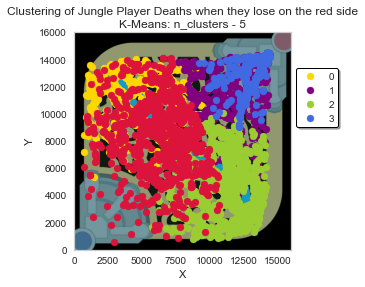

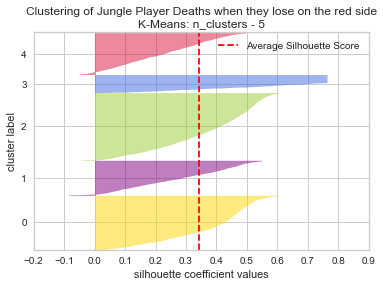

Silhouette score: 0.34347499304871737
2    1640
0    1315
4    1013
1     845
3     431
Name: cluster, dtype: int64

Inertia: 5402.644527061888

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6019.574905,10755.085932,8.047684
1,1,11718.700592,10916.688757,23.779565
2,2,10745.181098,5539.417683,10.501577
3,3,13431.772622,13588.466357,4.568890
4,4,6277.663376,8581.883514,23.603083


In [49]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_
cluster_colors = np.array(["gold", "purple", "yellowgreen", "royalblue", "crimson"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, cluster_colors, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 4

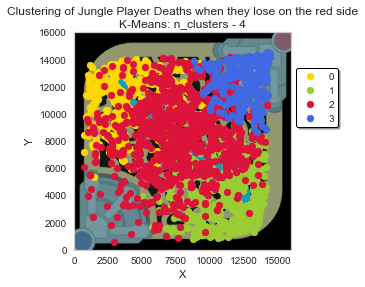

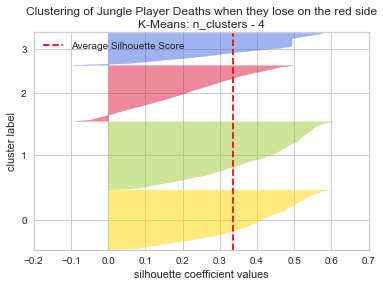

Silhouette score: 0.3351087593802259
1    1657
0    1454
2    1354
3     779
Name: cluster, dtype: int64

Inertia: 6493.800991979243

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5866.342503,10675.990371,8.980750
1,1,10772.385637,5587.585999,10.498214
2,2,8080.141064,8811.370753,24.817375
3,3,13181.631579,13209.430039,12.479926


In [50]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_
cluster_colors = np.array(["gold", "yellowgreen", "crimson", "royalblue"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, cluster_colors, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

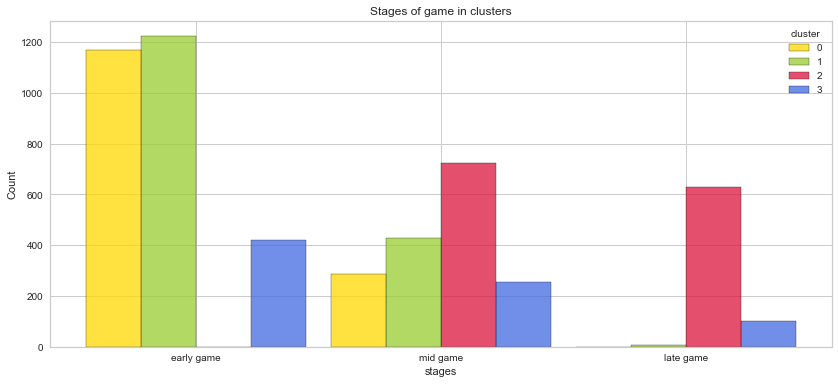

In [51]:
stagesPerClusterV2(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 3

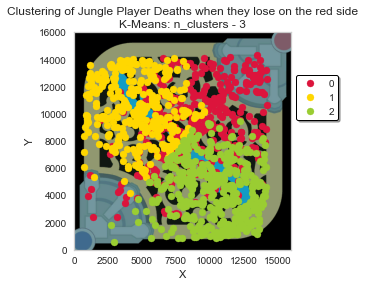

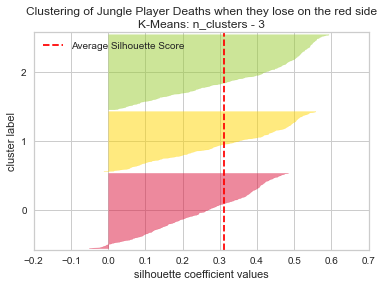

Silhouette score: 0.31222621718105226
0    444
2    443
1    354
Name: cluster, dtype: int64

Inertia: 1797.3798537831494

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9140.324324,9105.524775,25.000074
1,1,4776.584746,10341.302260,13.339671
2,2,10296.000000,4446.383747,11.702276


In [119]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [36]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2752.287827,2665.321108,5.219295
1,1,2071.456325,2122.463859,6.291988
2,2,2226.066239,2136.690806,5.632825


In [37]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14227.0,1012.0,14300.0,2380.0,41.677333,14.384850
1,1,9560.0,753.0,14082.0,4216.0,31.615533,0.836783
2,2,14107.0,2688.0,9442.0,558.0,28.300833,0.731083


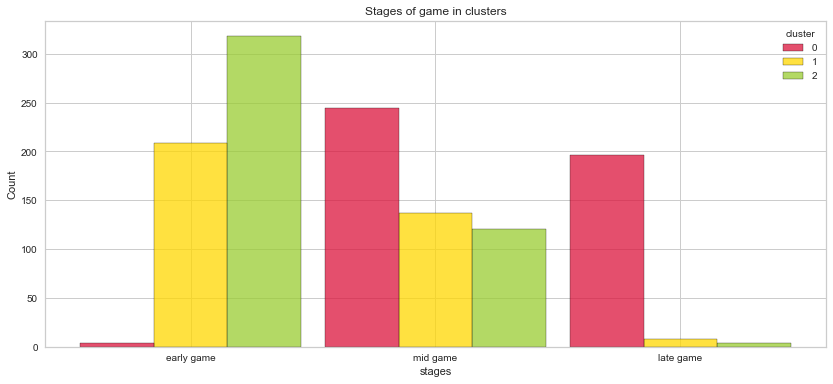

In [120]:
stagesPerClusterV2(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

In [ ]:
scatterTimestamp(redSideDefeat_df)

---
### Clustering Blue Team Victory

In [52]:
blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6151,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6152,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,1.000117,5281.0,9076.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6153,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,2.000583,2682.0,8436.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6156,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,3.000883,9684.0,2577.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6158,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,4.001017,11260.0,4972.0,3.0,0.0,...,14.0,48.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275337,NA1_4584631779,Blue,anonymous 37,na1,Gragas,12.002833,10156.0,6798.0,8.0,2.0,...,654.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275339,NA1_4584631779,Blue,anonymous 37,na1,Gragas,13.003033,10872.0,4964.0,8.0,2.0,...,654.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275341,NA1_4584631779,Blue,anonymous 37,na1,Gragas,14.003233,11291.0,7501.0,9.0,7.0,...,766.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275344,NA1_4584631779,Blue,anonymous 37,na1,Gragas,15.003900,6460.0,7863.0,10.0,7.0,...,766.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [28]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

34.59915611814346

In [38]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 4 matches on the blue side
anonymous 24 has an average of 2.0 deaths per game when winning on the blue side

anonymous 25 won 9 matches on the blue side
anonymous 25 has an average of 3.6666666666666665 deaths per game when winning on the blue side

anonymous 26 won 13 matches on the blue side
anonymous 26 has an average of 4.230769230769231 deaths per game when winning on the blue side

anonymous 27 won 5 matches on the blue side
anonymous 27 has an average of 5.4 deaths per game when winning on the blue side

anonymous 28 won 7 matches on the blue side
anonymous 28 has an average of 5.714285714285714 deaths per game when winning on the blue side

anonymous 29 won 12 matches on the blue side
anonymous 29 has an average of 4.083333333333333 deaths per game when winning on the blue side

anonymous 30 won 16 matches on the blue side
anonymous 30 has an average of 3.875 deaths per game when winning on the blue side

anonymous 31 won 9 matches on the blue side
anonymous 31

In [24]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 168 matches in which the jungler died at least once
20 players died a total of 656 times on the blue side
Victory games on blue side contains an average of 3.9047619047619047 deaths per game


In [53]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
6151,557.0,345.0,0.000000
6152,5281.0,9076.0,1.000117
6153,2682.0,8436.0,2.000583
6156,9684.0,2577.0,3.000883
6158,11260.0,4972.0,4.001017
...,...,...,...
275337,10156.0,6798.0,12.002833
275339,10872.0,4964.0,13.003033
275341,11291.0,7501.0,14.003233
275344,6460.0,7863.0,15.003900


Normalize Data:

In [54]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[-1.74609925, -1.80167753, -1.50519547],
       [-0.43965808,  0.66547739, -1.39423964],
       [-1.15842197,  0.48462993, -1.28324497],
       ...,
       [ 1.22243155,  0.2204231 ,  0.04836375],
       [-0.1136009 ,  0.32271494,  0.15938061],
       [ 0.15355028,  0.34192999,  0.18021198]])

In [55]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2767486001785937
Silhouette score for k=3: 0.29281181498501024
Silhouette score for k=4: 0.35473557367513275
Silhouette score for k=5: 0.35298998736165355
Silhouette score for k=6: 0.33920298198545645
Silhouette score for k=7: 0.3280057062936741
Silhouette score for k=8: 0.3132004635094982
Silhouette score for k=9: 0.29854568828597244
Silhouette score for k=10: 0.2983210468181202
Silhouette score for k=11: 0.30155670108124083
Silhouette score for k=12: 0.3067658799132859
Silhouette score for k=13: 0.31170423230732247
Silhouette score for k=14: 0.3128237057613489
Silhouette score for k=15: 0.30869322656297365
Silhouette score for k=16: 0.3098785111104271
Silhouette score for k=17: 0.30572677707281254
Silhouette score for k=18: 0.3037029558945123
Silhouette score for k=19: 0.30020253419916904
Silhouette score for k=20: 0.30116105458536585
Silhouette score for k=25: 0.29090831867253575


K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 4

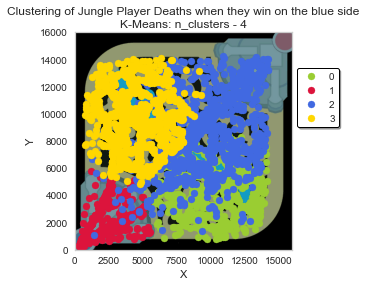

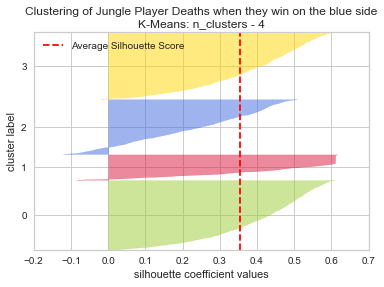

Silhouette score: 0.35473557367513275
0    1573
3    1498
2    1243
1     574
Name: cluster, dtype: int64

Inertia: 5711.8970224605955

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9418.301971,4383.518754,9.734043
1,1,1735.888502,1512.148084,8.833030
2,2,9085.017699,9117.162510,24.765231
3,3,4325.949266,9182.979306,10.114800


In [57]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
cluster_colors = np.array(["yellowgreen", "crimson", "royalblue", "gold"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, cluster_colors, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

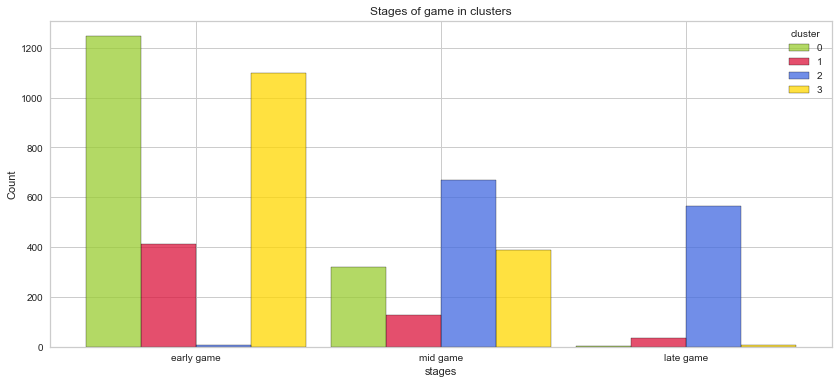

In [58]:
stagesPerClusterV2(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 3

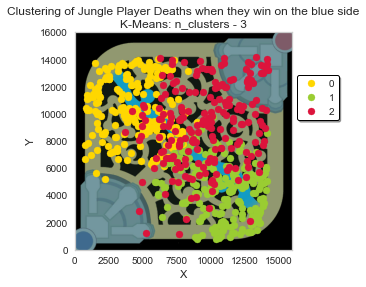

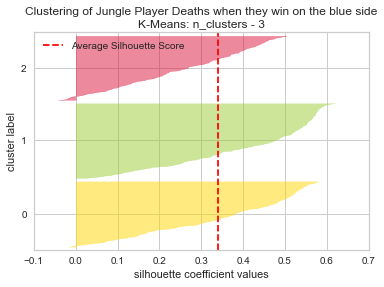

Silhouette score: 0.34039185330360516
1    240
0    210
2    206
Name: cluster, dtype: int64

Inertia: 873.5956332297907

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4552.004762,10137.371429,12.405626
1,1,10754.458333,4533.933333,10.693595
2,2,9677.092233,9219.825243,24.510575


In [124]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

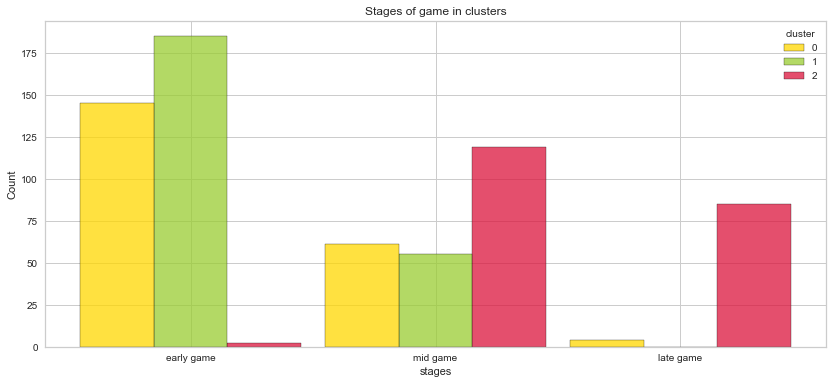

In [125]:
stagesPerClusterV2(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", kmeans, "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

In [ ]:
scatterTimestamp(blueSideVictory_df)

---
### Clustering Blue Team Defeat

In [59]:
blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6466,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6467,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,1.000083,5170.0,8539.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6468,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,2.000300,2603.0,8236.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6471,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.000350,6579.0,3050.0,3.0,0.0,...,0.0,24.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6473,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,4.000467,5093.0,9429.0,3.0,0.0,...,0.0,40.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275394,NA1_4584524732,Blue,anonymous 41,na1,Poppy,26.009117,2980.0,11546.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275396,NA1_4584524732,Blue,anonymous 41,na1,Poppy,27.009233,3041.0,8132.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275397,NA1_4584524732,Blue,anonymous 41,na1,Poppy,28.009250,7145.0,4977.0,14.0,21.0,...,1304.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275400,NA1_4584524732,Blue,anonymous 41,na1,Poppy,29.009800,2580.0,10011.0,14.0,22.0,...,1431.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [30]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

65.40084388185655

In [40]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 10 matches on the blue side
anonymous 24 has an average of 6.0 deaths per game when losing on the blue side

anonymous 25 lost 10 matches on the blue side
anonymous 25 has an average of 8.0 deaths per game when losing on the blue side

anonymous 26 lost 18 matches on the blue side
anonymous 26 has an average of 6.611111111111111 deaths per game when losing on the blue side

anonymous 27 lost 10 matches on the blue side
anonymous 27 has an average of 6.5 deaths per game when losing on the blue side

anonymous 28 lost 1 matches on the blue side
anonymous 28 has an average of 8.0 deaths per game when losing on the blue side

anonymous 29 lost 20 matches on the blue side
anonymous 29 has an average of 5.9 deaths per game when losing on the blue side

anonymous 30 lost 14 matches on the blue side
anonymous 30 has an average of 6.0 deaths per game when losing on the blue side

anonymous 31 lost 12 matches on the blue side
anonymous 31 has an average of 7.083333333333333 dea

In [31]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 191 matches in which the jungler died at least once
20 players died a total of 1240 times on the blue side
Defeat games on blue side contains an average of 6.492146596858639 deaths per game


In [60]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
6466,557.0,345.0,0.000000
6467,5170.0,8539.0,1.000083
6468,2603.0,8236.0,2.000300
6471,6579.0,3050.0,3.000350
6473,5093.0,9429.0,4.000467
...,...,...,...
275394,2980.0,11546.0,26.009117
275396,3041.0,8132.0,27.009233
275397,7145.0,4977.0,28.009250
275400,2580.0,10011.0,29.009800


Normalize Data:

In [61]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[-1.57698502, -1.6798786 , -1.55667853],
       [-0.17885152,  0.83363417, -1.44652199],
       [-0.95687205,  0.7406888 , -1.33635076],
       ...,
       [ 0.41974238, -0.25901075,  1.52846642],
       [-0.96384302,  1.28517076,  1.63867436],
       [-0.84169955,  0.99621188,  1.66039175]])

In [62]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2632417052108336
Silhouette score for k=3: 0.33188621560437775
Silhouette score for k=4: 0.33300764575368547
Silhouette score for k=5: 0.3388497935643636
Silhouette score for k=6: 0.3254117609050062
Silhouette score for k=7: 0.30743205149868336
Silhouette score for k=8: 0.30098635002052354
Silhouette score for k=9: 0.29420627301320945
Silhouette score for k=10: 0.2959723339681723
Silhouette score for k=11: 0.298385722827692
Silhouette score for k=12: 0.30103129029814407
Silhouette score for k=13: 0.29952537649647326
Silhouette score for k=14: 0.3011284796062081
Silhouette score for k=15: 0.2996226144177553
Silhouette score for k=16: 0.29611026974792265
Silhouette score for k=17: 0.2908275359803976
Silhouette score for k=18: 0.291281542711704
Silhouette score for k=19: 0.2856756511100784
Silhouette score for k=20: 0.2897581517966919
Silhouette score for k=25: 0.290710182216318


K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 4

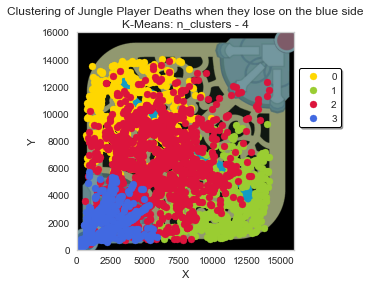

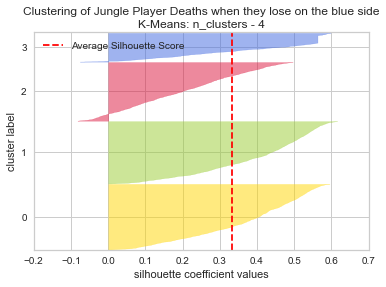

Silhouette score: 0.33300764575368547
0    1638
1    1559
2    1467
3     721
Name: cluster, dtype: int64

Inertia: 6577.749110744269

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4239.346764,9048.397436,10.113022
1,1,9347.632457,4051.039128,9.711012
2,2,5700.626449,6231.460804,24.936839
3,3,1578.812760,1483.603329,10.842714


In [63]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
cluster_colors = np.array(["gold", "yellowgreen", "crimson", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, cluster_colors, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

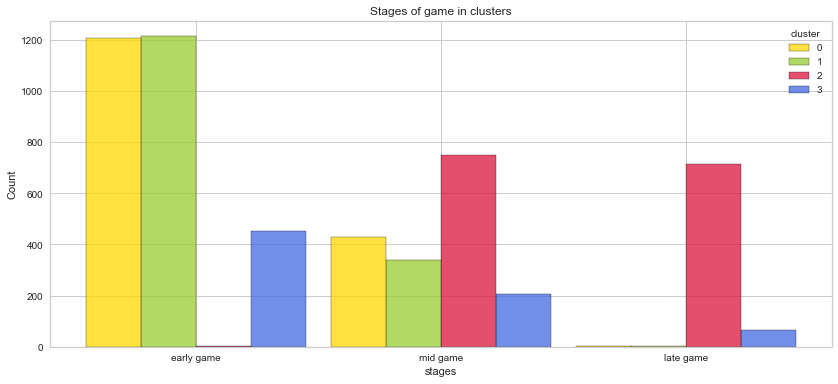

In [64]:
stagesPerClusterV2(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 3

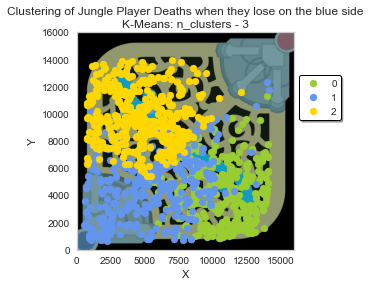

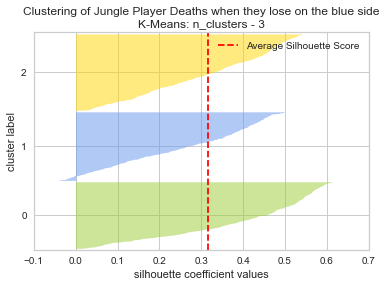

Silhouette score: 0.3167706502848467
2    448
1    402
0    390
Name: cluster, dtype: int64

Inertia: 1748.7892278992467

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10509.825641,4310.476923,11.716497
1,1,5404.358209,5202.283582,25.352320
2,2,4757.863839,9706.917411,14.592536


In [130]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "cornflowerblue", "gold"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, cluster_colors ,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

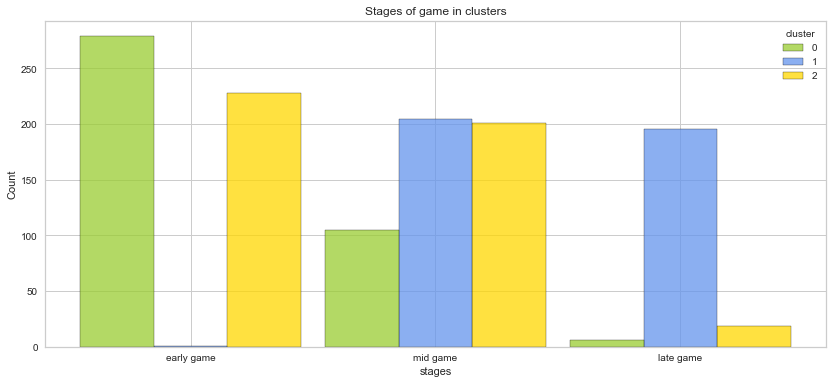

In [131]:
stagesPerClusterV2(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", kmeans, "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

In [ ]:
scatterTimestamp(blueSideDefeat_df)

---

### Blue Win Rate vs Red Win Rate

In [31]:
wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6038,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,5.124400,7396.0,6838.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6041,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,6.737800,10140.0,2505.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6221,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,7.901383,4114.0,7822.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6226,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,10.258183,5128.0,3384.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275607,KR_6376002673,Red,anonymous 48,kr,Gragas,22.257083,6048.0,5969.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275614,KR_6376002673,Red,anonymous 48,kr,Gragas,25.482650,6742.0,4329.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275648,KR_6375973806,Red,anonymous 48,kr,Gragas,12.092683,4159.0,10322.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [32]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 63.021420518602035 vs Blue: 36.97857948139797
